In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [63]:
originalData= pd.read_excel("dataset.xlsx", engine='openpyxl')


In [64]:

originalData.head(3) # First 3 samples of the our dataset #

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22.0,17.0,3.0,169.0,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11.0,20.0,14.0,494.0,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2.0,1.0,0.0,4.0,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


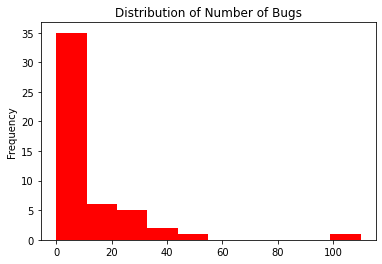

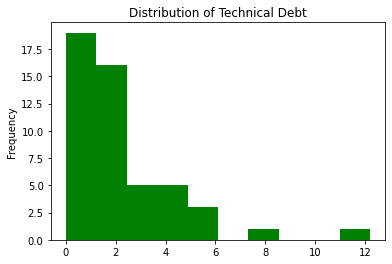

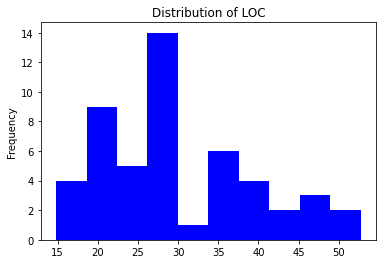

In [65]:
# Distribution of 3 metrics #
def plotHist(columnName,colorName):
    originalData[columnName].plot(kind='hist',color=colorName)
    if columnName=="NOB":
        columnName='Number of Bugs'
    elif columnName=="TD":
        columnName='Technical Debt'
    elif columnName=="LOC":
        columnName=='Line of Code'
    title="Distribution of {}".format(columnName)
    plt.title(title)
    plt.show()
plotHist('NOB','r')
plotHist('TD','g')
plotHist('LOC','b')


In [66]:
# Min max scaler for all data #

data_to_scale = originalData.iloc[:,1:]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(originalData.iloc[:50,1:])
scaledTable=pd.DataFrame(scaled_data)
scaledTable.columns=list(data_to_scale)
scaledTable

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


# Part1 (Statistical Correlation Analysis)

In [67]:
# Correlation matrix of all metrics #

CorData=originalData.corr(method='spearman')
CorData

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [68]:
# P-Values #
np.set_printoptions(suppress=True)
pValues=np.around(scipy.stats.spearmanr(scaledTable)[1],decimals=4)

column=originalData.iloc[:,1:]
pValuesTable=pd.DataFrame(pValues)
pValuesTable.columns=list(column)
pValuesTable.index=list(column)

pValuesTable





,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


<AxesSubplot:>

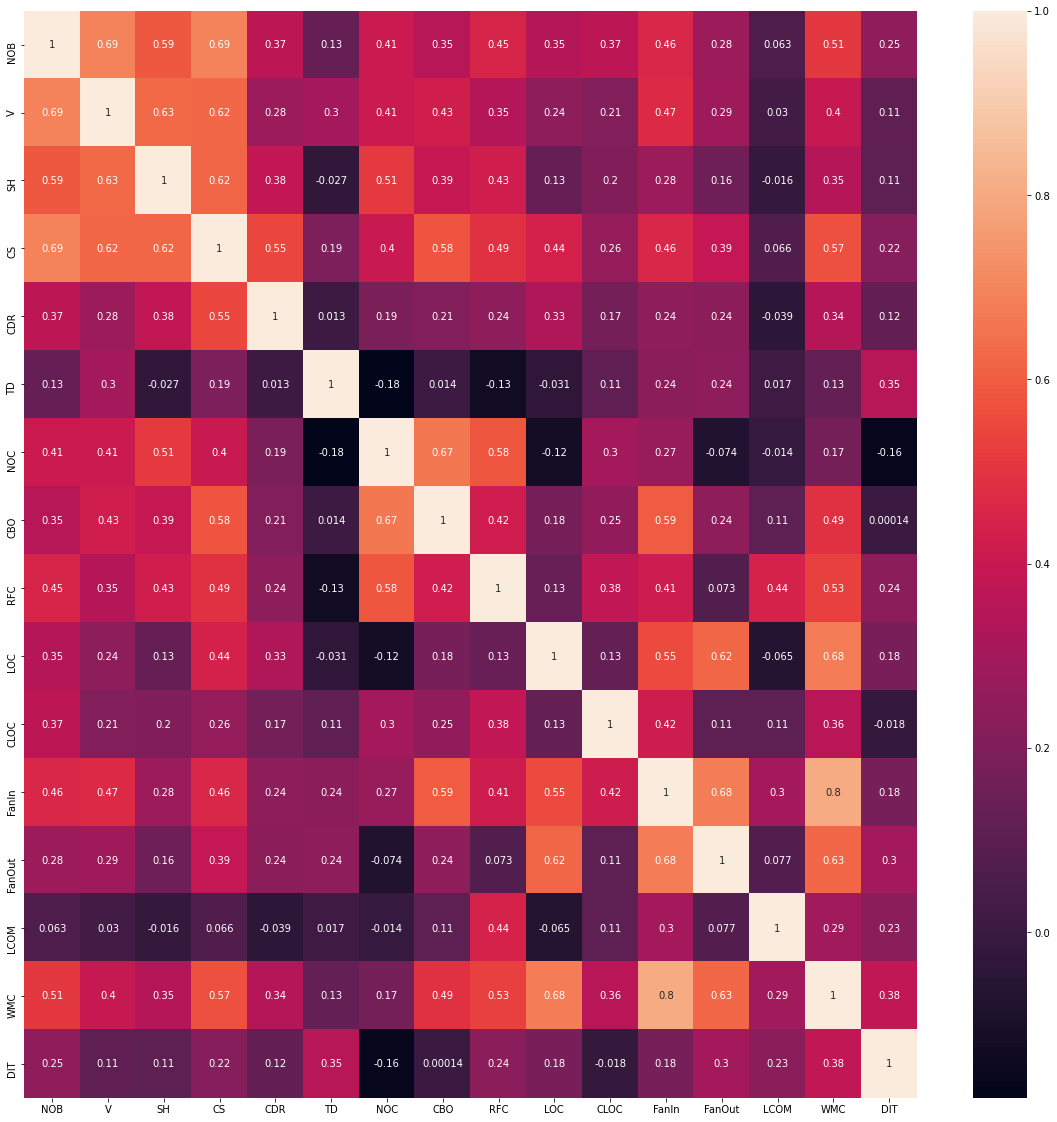

In [69]:
# Heatmap of the correlation matrix #
plt.figure(figsize=(20,20))
sns.heatmap(CorData, annot=True)

In [70]:
# Correlation between External Metrics & TD #
TD_EXcol=originalData.loc[:,"NOB":"TD"]

TD_EXcol.corr(method='spearman')

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [71]:
# Correlation between Internal Metrics & TD #
TD_INcol=originalData.loc[:,"CDR":"DIT"]

TD_INcol.corr(method='spearman')

,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


# Part2 (ML Modelling)


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

random_state_fixed=53


def plotGraph(y_test,y_pred,regressorName):
  org_value=plt.scatter(y_test,y_test,color = "red")
  predicted=plt.scatter(y_test,y_pred,color="blue")
  
  plt.title(regressorName)
  plt.legend((predicted,org_value),('Predicted Values','Original Values'))
  plt.show()
  

y_pred="NaN"
def linearRegression(X_train,y_train,X_test,y_test):
  global y_pred
  reg_all=LinearRegression()
  reg_all.fit(X_train,y_train)
  y_pred = reg_all.predict(X_test) 
  print("R-Squared Value: {}".format(r2_score(y_test, y_pred)))
  print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

def svrRegression(X_train,y_train,X_test,y_test):
  global y_pred
  SVR_model= SVR(kernel="linear")
  SVR_model.fit(X_train,y_train)
  y_pred=SVR_model.predict(X_test)
  print("R-Squared Value: {}".format(r2_score(y_test, y_pred)))
  print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

def svrRegression2(X_train,y_train,X_test,y_test):
  global y_pred
  SVR_model= SVR(kernel="rbf")
  SVR_model.fit(X_train,y_train)
  y_pred=SVR_model.predict(X_test)
  print("R-Squared Value: {}".format(r2_score(y_test, y_pred)))
  print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))


def decisionTreeRegression(X_train,y_train,X_test,y_test):
  global y_pred
  DTReg_model= DecisionTreeRegressor()
  DTReg_model.fit(X_train,y_train)
  y_pred= DTReg_model.predict(X_test)
  print("R-Squared Value: {}".format(r2_score(y_test, y_pred)))
  print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

def randomDecTreeRegression(X_train,y_train,X_test,y_test):
  global y_pred
  RFreg_model= RandomForestRegressor()
  RFreg_model.fit(X_train,y_train)
  y_pred= RFreg_model.predict(X_test)
  print("R-Squared Value: {}".format(r2_score(y_test, y_pred)))
  print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

def mlpRegressor(X_train,y_train,X_test,y_test):
  global y_pred
  MLP_model= MLPRegressor()
  MLP_model.fit(X_train,y_train)
  y_pred= MLP_model.predict(X_test)
  print("R-Squared Value: {}".format(r2_score(y_test, y_pred)))
  print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))


In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [73]:
X = scaledTable.iloc[:,6:].values
yCDR= scaledTable.iloc[:,4].values #CDR
yTD= scaledTable.iloc[:,5].values #TD

#PREDICT FOR CDR
X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size = 0.3,random_state = 53)
#PREDICT FOR TD
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, yTD, test_size = 0.3,random_state = 53)

R-Squared Value: -0.25353936900603147
Root Mean Squared Error: 0.2822820349754406


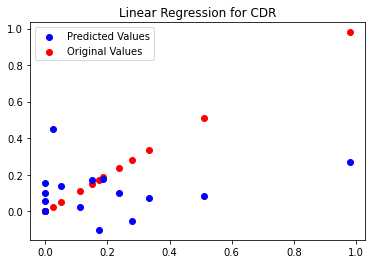

R-Squared Value: -0.1729675304692071
Root Mean Squared Error: 0.2650640776760429


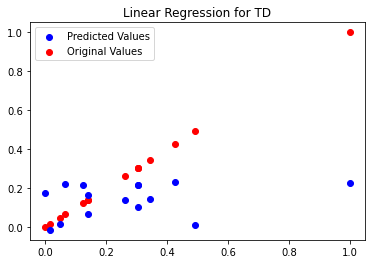

In [74]:
linearRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Linear Regression for CDR")

linearRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Linear Regression for TD")

R-Squared Value: -0.12212300389682218
Root Mean Squared Error: 0.26707576644347575


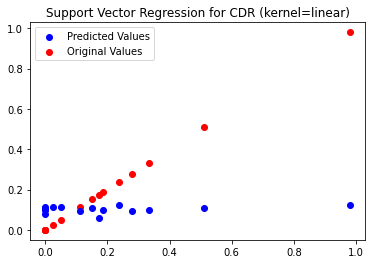

R-Squared Value: -0.16455641994479642
Root Mean Squared Error: 0.27207868349808145


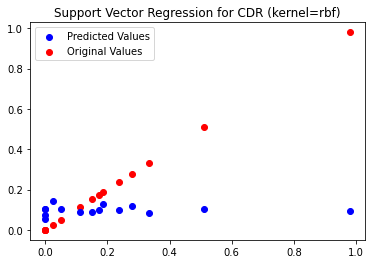

R-Squared Value: -0.3526354995047598
Root Mean Squared Error: 0.2846415332813681


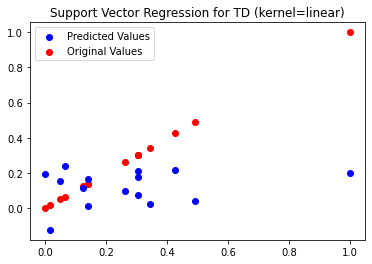

R-Squared Value: -0.07658669531666273
Root Mean Squared Error: 0.25394074173641473


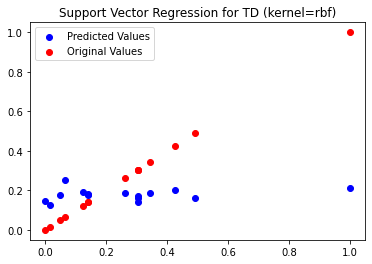

In [75]:
svrRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Support Vector Regression for CDR (kernel=linear)")

svrRegression2(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Support Vector Regression for CDR (kernel=rbf)")

svrRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Support Vector Regression for TD (kernel=linear)")

svrRegression2(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Support Vector Regression for TD (kernel=rbf)")

R-Squared Value: -0.13060312387420292
Root Mean Squared Error: 0.26808304089966556


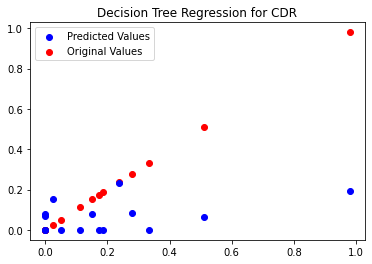

R-Squared Value: -0.4294545200753763
Root Mean Squared Error: 0.29261261863561017


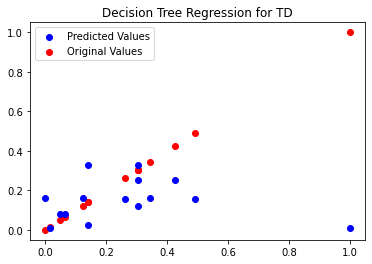

In [76]:
decisionTreeRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Decision Tree Regression for CDR")

decisionTreeRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Decision Tree Regression for TD")


R-Squared Value: -0.024610508209175652
Root Mean Squared Error: 0.25520762936941815


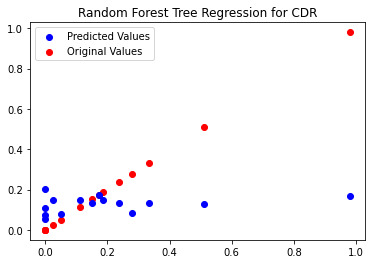

R-Squared Value: -0.137998277615482
Root Mean Squared Error: 0.261083052661395


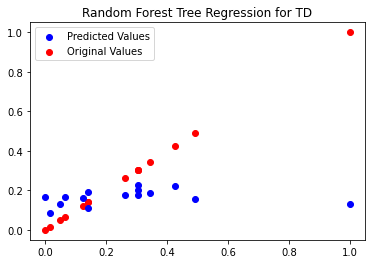

In [77]:
randomDecTreeRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Random Forest Tree Regression for CDR")

randomDecTreeRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Random Forest Tree Regression for TD")

R-Squared Value: -0.6241372953544104
Root Mean Squared Error: 0.32131101955106195


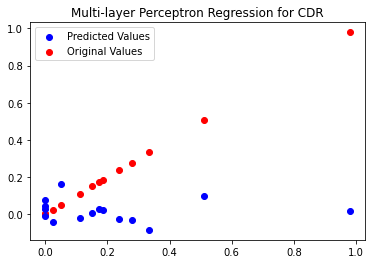

R-Squared Value: -0.09631066068193062
Root Mean Squared Error: 0.2562563867354935


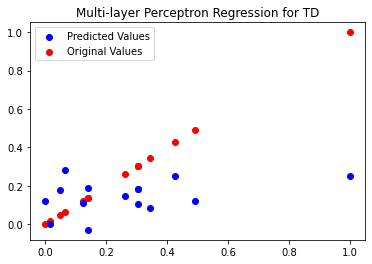

In [78]:
mlpRegressor(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Multi-layer Perceptron Regression for CDR")

mlpRegressor(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Multi-layer Perceptron Regression for TD")

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [79]:
X = scaledTable.iloc[:,0:4].values
yCDR= scaledTable.iloc[:,4].values #CDR
yTD= scaledTable.iloc[:,5].values #TD
#PREDICT FOR CDR
X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size = 0.3,random_state = 53)
#PREDICT FOR TD
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, yTD, test_size = 0.3,random_state = 53)



R-Squared Value: -0.29877407933861844
Root Mean Squared Error: 0.2873300555429503


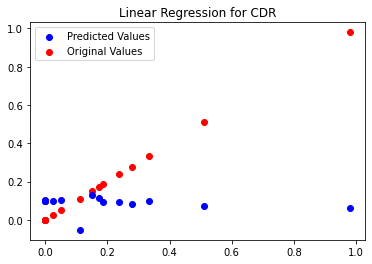

R-Squared Value: -0.4331628534217624
Root Mean Squared Error: 0.2929919249634493


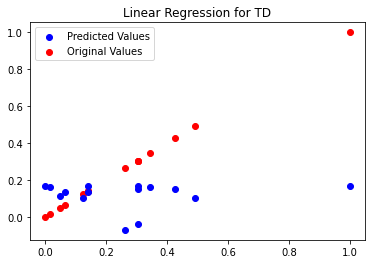

In [80]:
linearRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Linear Regression for CDR")

linearRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Linear Regression for TD")

R-Squared Value: -0.10105796501066222
Root Mean Squared Error: 0.2645570517029422


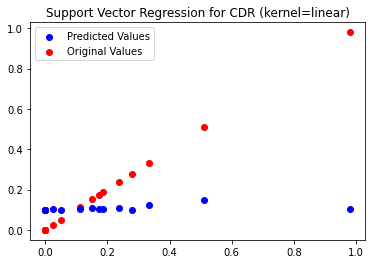

R-Squared Value: -0.05742000726843233
Root Mean Squared Error: 0.2592614897703499


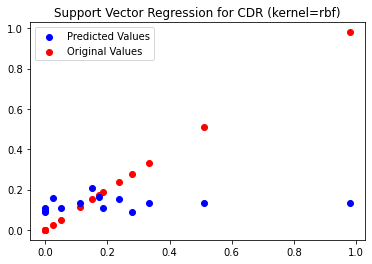

R-Squared Value: -0.3170558678590276
Root Mean Squared Error: 0.28087299055485854


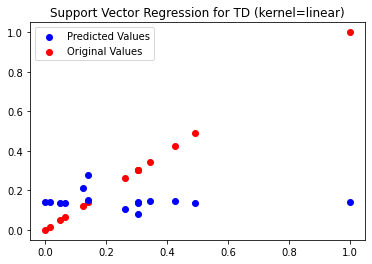

R-Squared Value: -0.4528155144917989
Root Mean Squared Error: 0.29499395333530964


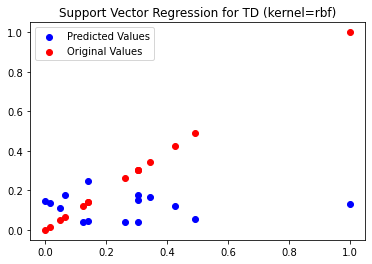

In [81]:
svrRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Support Vector Regression for CDR (kernel=linear)")

svrRegression2(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Support Vector Regression for CDR (kernel=rbf)")

svrRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Support Vector Regression for TD (kernel=linear)")

svrRegression2(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Support Vector Regression for TD (kernel=rbf)")

R-Squared Value: -0.4503383186437293
Root Mean Squared Error: 0.30363295853069844


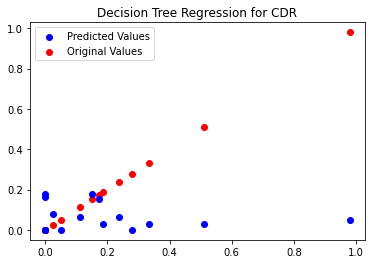

R-Squared Value: -0.7373151739334176
Root Mean Squared Error: 0.3225872409043277


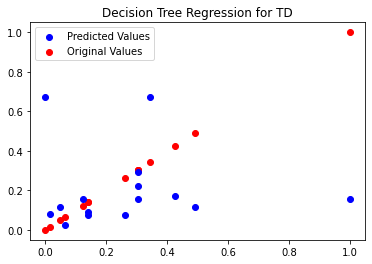

In [82]:
decisionTreeRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Decision Tree Regression for CDR")

decisionTreeRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Decision Tree Regression for TD")


R-Squared Value: -0.2929954468766609
Root Mean Squared Error: 0.28669013447884084


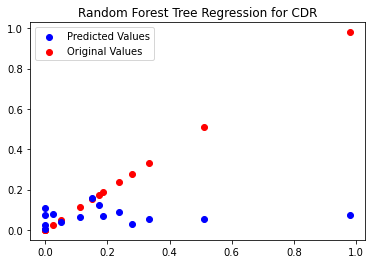

R-Squared Value: -0.06258095144919573
Root Mean Squared Error: 0.25228352626951683


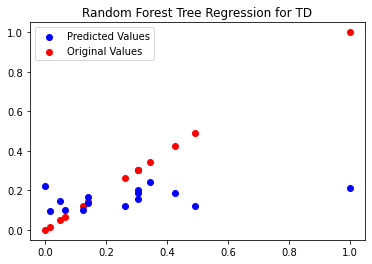

In [83]:
randomDecTreeRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Random Forest Tree Regression for CDR")

randomDecTreeRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Random Forest Tree Regression for TD")

R-Squared Value: -0.0978506695438941
Root Mean Squared Error: 0.2641714537263136


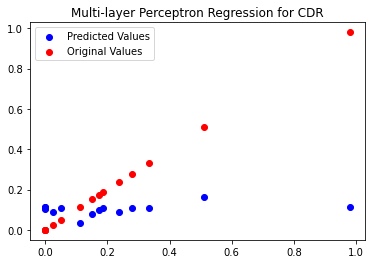

R-Squared Value: -0.26942766314093625
Root Mean Squared Error: 0.27574767457816074


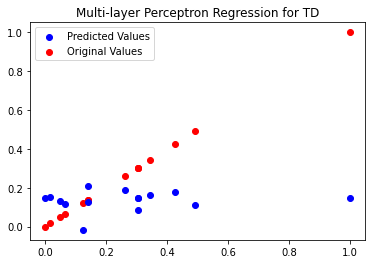

In [84]:
mlpRegressor(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Multi-layer Perceptron Regression for CDR")

mlpRegressor(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Multi-layer Perceptron Regression for TD")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [85]:
Table=scaledTable.drop(scaledTable.iloc[:,4:6].columns,axis = 1)
X = Table.iloc[:,:].values
yCDR= scaledTable.iloc[:,4].values #CDR
yTD= scaledTable.iloc[:,5].values #TD


#PREDICT FOR CDR
X_train, X_test, y_train, y_test = train_test_split(X, yCDR, test_size = 0.3,random_state = 53)
#PREDICT FOR TD
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, yTD, test_size = 0.3,random_state = 53)


R-Squared Value: -2.009141591295789
Root Mean Squared Error: 0.43735647669844563


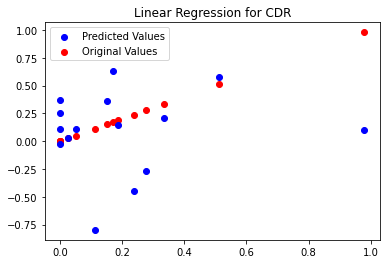

R-Squared Value: -0.0036332791000981413
Root Mean Squared Error: 0.24518585195724796


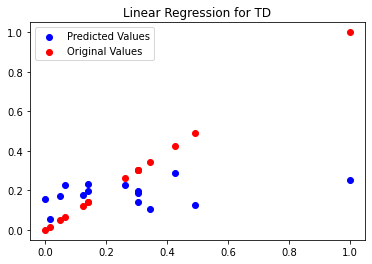

In [86]:
linearRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Linear Regression for CDR")

linearRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Linear Regression for TD")

R-Squared Value: -0.16057097814495047
Root Mean Squared Error: 0.27161271934565


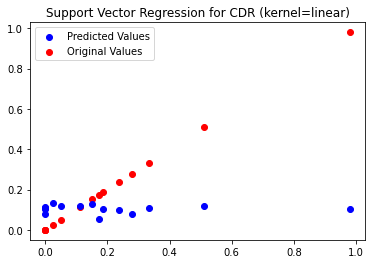

R-Squared Value: -0.2394591996677582
Root Mean Squared Error: 0.2806922153718833


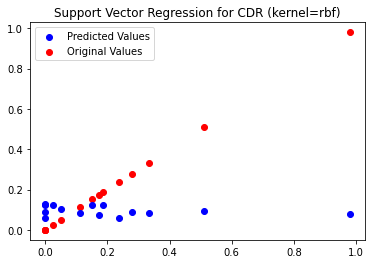

R-Squared Value: -0.3628117224693006
Root Mean Squared Error: 0.28571024254777505


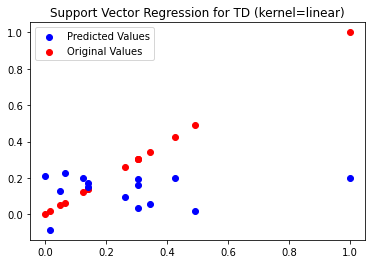

R-Squared Value: -0.097209216480042
Root Mean Squared Error: 0.25636138138174125


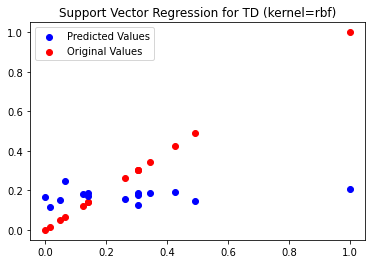

In [87]:
svrRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Support Vector Regression for CDR (kernel=linear)")

svrRegression2(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Support Vector Regression for CDR (kernel=rbf)")

svrRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Support Vector Regression for TD (kernel=linear)")

svrRegression2(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Support Vector Regression for TD (kernel=rbf)")

R-Squared Value: -0.07118780697467852
Root Mean Squared Error: 0.2609438470706189


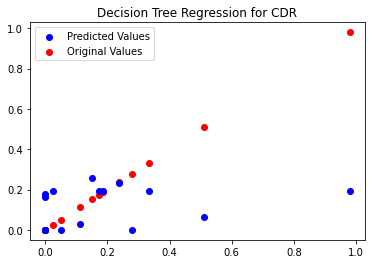

R-Squared Value: -0.2813942590506193
Root Mean Squared Error: 0.2770443301544604


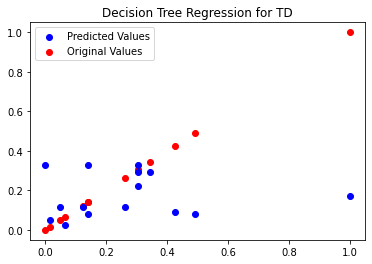

In [88]:
decisionTreeRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Decision Tree Regression for CDR")

decisionTreeRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Decision Tree Regression for TD")


R-Squared Value: 0.0077157071162841095
Root Mean Squared Error: 0.2511494948601191


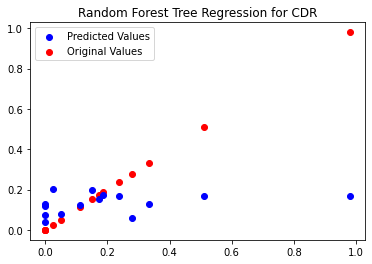

R-Squared Value: 0.0772586169077839
Root Mean Squared Error: 0.23509742844187786


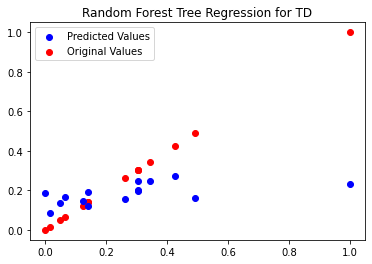

In [89]:
randomDecTreeRegression(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Random Forest Tree Regression for CDR")

randomDecTreeRegression(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Random Forest Tree Regression for TD")

R-Squared Value: -0.548271056895735
Root Mean Squared Error: 0.31371677959662575


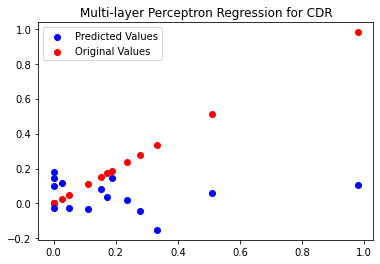

R-Squared Value: -0.28957843315949994
Root Mean Squared Error: 0.2779276531974387


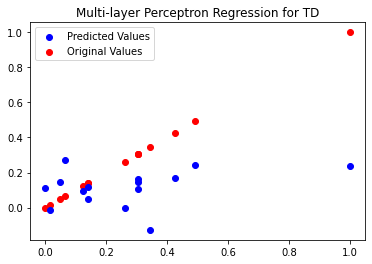

In [90]:
mlpRegressor(X_train,y_train,X_test,y_test)
plotGraph(y_test,y_pred,"Multi-layer Perceptron Regression for CDR")

mlpRegressor(X_train2,y_train2,X_test2,y_test2)
plotGraph(y_test2,y_pred,"Multi-layer Perceptron Regression for TD")